# Teste de Hipótese

Vamos começar importando a biblioteca `pandas` e a base de dados.

In [ ]:
import pandas as pd

In [ ]:
# importando os dados

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/ArquivosColab/FontedosDados.xlsx')
df.head()

Mounted at /content/drive


,nomeLocalidade,estado,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,...,Percentual de empresas do setor terciário em relação ao total,Percentual de trabalhadores do setor primário em relação ao total,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes"
0,Acrelândia,Acre,12538,6.93,52.92,43.04,4.04,48.34,0.00,75.34,...,75.41,8.86,21.53,34.07,994.67,2654247.23,19.17,9.62,12.12,0.0
1,Assis Brasil,Acre,6072,1.22,55.58,40.07,4.35,65.30,2.39,66.83,...,100.00,0.60,0.00,36.25,1163.49,2113108.99,10.57,7.44,17.79,0.0
2,Brasiléia,Acre,21398,5.46,51.88,42.76,5.37,70.02,21.27,70.67,...,83.85,2.53,17.70,33.83,818.65,2376384.22,11.13,5.96,14.58,0.0
3,Bujari,Acre,8471,2.79,52.71,42.60,4.69,44.07,0.16,71.05,...,53.33,31.34,1.04,29.40,897.30,2668575.85,9.76,3.41,5.78,0.0
4,Capixaba,Acre,8798,5.17,53.92,41.92,4.16,44.60,0.82,77.90,...,62.50,4.30,30.37,10.32,843.49,2803488.37,6.35,4.14,7.73,0.0


### Exemplo 1: Uma pessoa acredita que a densidade demográfica para o estado do Acre é maior que 10 hab/km². A crença dela está correta?

Primeiramente, vamos pegar apenas os dados do Acre para facilitar nossa análise.

In [ ]:
df_acre = df[df['estado'] == 'Acre']

Vamos visualizar o histograma desta variável a fim de tentar visualizar com maior facilidade a dispersão dos valores e ter uma intuição sobre a afirmação de que a densidade demográfica no estado do Acre é maior que 10 hab/km².

Para isso vamos usar a função `histplot()` da biblioteca `seaborn`, para mais detalhes [clique aqui](https://seaborn.pydata.org/generated/seaborn.histplot.html)

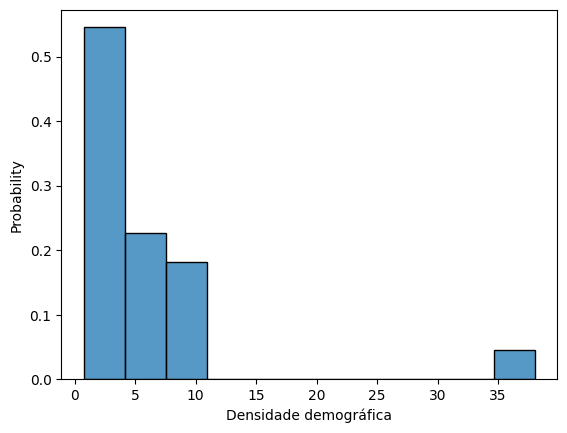

In [ ]:
import seaborn as sns

sns.histplot(data=df_acre, x='Densidade demográfica', stat='probability');

Observando o gráfico podemos ver que a grande maioria dos valores parece ser menor que 10 hab/km², embora haja valores bem maiores. Então somos levados a acreditar que a densidade demográfica não deve ser maior que 10 hab/km², mas como ter certeza disto?

A maneira correta de verificar se uma afirmação está correta ou não é através de um teste de hipóteses.

# Teste de Hipótese para a Média (uma variável)

Se quisermos testar a hipótese de que a média de uma amostra é igual a determinado valor, podemos realizar um teste de hipótese conhecido como teste t. Para tando podemos usar a função `scipy.stats.ttest_1samp()` do pacote [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html).

Esta função retorna 2 valores: o valor de t calculado e o p-valor. Se o p-valor for menor que o nível de significância, então rejeita-se a hipótese nula ($H_0$: a média amostral é igual ao valor testado).

Para utilizar a função `ttest_1samp()`, passe a amostra como argumento da função e configure o parâmetro `alternative` para se adaptar ao teste do problema (unicaudal ou bicaudal).

Também poderíamos usar o teste t para comparar duas médias amostrais.

O teste t é um modelo estatístico, que assume os seguintes pressupostos:

(i) Os dados são aleatórios e representativos da população

(ii) A variável dependente é contínua

(iii) Os resíduos do modelo são normalmente distribuídos

Quando utilizar o teste t para comparar os resultados de dois grupos, é também necessário que:

(iv) Ambos os grupos sejam independentes

(v) A variância residual seja homogênea

Quando se utiliza o Teste T pareado, o princípio da independência não é mais solicitado, mas é necessário que:

(vi) O tamanho amostral seja o mesmo nos grupos

**Observação**: Quando os pressupostos não forem satisfeitos deve-se fazer alguns ajustes ou utilizar um outro teste (não paramétrico).

# Passo a Passo do Teste de Hipótese

1) Enunciar a hipótese nula (a hipótese nula é aquela que deseja-se rejeitar)

2) Enunciar a hipótese alternativa

3) Fixar o nível de significância $\alpha$

4) Identificar a distribuição de probabilidade adequada ao teste

5) Calcular o valor da estatística correspondente com base na amostra

6) Conclusão: rejeição ou aceitação da hipótese nula

Para o nosso exemplo vamos considerar um nível de significância de 95%.

Neste caso temos um teste unicaudal com as hipóteses nula e alternativa dadas por:

$$H_0: \mu \geq 10$$
$$H_a: \mu < 10$$

In [ ]:
from scipy.stats import ttest_1samp

ttest_1samp(a=df_acre['Densidade demográfica'], popmean=10, alternative='less')

TtestResult(statistic=-2.6716745995243176, pvalue=0.007138776001662828, df=21)

Como o p-valor é menor que o nível de significância, podemos rejeitar a hipótese nula, isto é, podemos afirmar com 95% de confiança que a densidade demográfica no estado do Acre não é maior do que 10 hab/km².

# Teste de Hipótese para a Média (duas variáveis independentes)

O teste t para duas amostras independentes é um teste de hipótese usado para verificar se há diferença estatística significante entre as médias de dois grupos.


O teste t é válido sob certas suposições:
* distribuições populacionais normais
* amostras possuem variância igual
* as amostras são independentes

Em geral, neste teste de hipótese as hipóteses nula e alternativa serão um dos três tipos abaixo. Isto é, queremos testar se a diferença entre as médias populacionais é comparável com um certo valor $D_0$, que em geral será 0 quando se quer testar a hipótese de as médias serem iguais.


$$H_0: \mu_1 - \mu_2 \leq D_0$$
$$H_a: \mu_1 - \mu_2 > D_0$$

ou

$$H_0: \mu_1 - \mu_2 \geq D_0$$
$$H_a: \mu_1 - \mu_2 < D_0$$

ou

$$H_0: \mu_1 - \mu_2 = D_0$$
$$H_a: \mu_1 - \mu_2 \neq D_0$$

### Exemplo 2: Teste a hipótese de que as médias da taxa de urbanização são iguais para os estados do Paraná e de São Paulo. Considere um nível de confiança de 95%.



Dica: Para realizar o teste t para duas amostra independentes pode-se usar a função `scipy.stats.ttest_ind()` passando os dois grupos como argumentos. Esta função retornará dois valores: o valor t calculado e o p-valor.


Outra Dica: Para selecionar os valores de interesse, primeiro selecione apenas a coluna de interesse e após aplique uma condição que filtre as linhas de interesse. Algo da forma `df[coluna][condicao para as linhas]`

In [ ]:
from scipy.stats import ttest_ind

ttest_ind(df['Taxa de Urbanização'][df['estado'] == 'Paraná'],
          df['Taxa de Urbanização'][df['estado'] == 'São Paulo'])

Ttest_indResult(statistic=-13.516575492569645, pvalue=1.7770979303401817e-38)

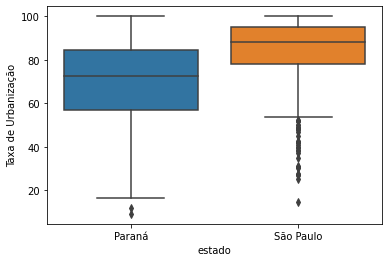

In [ ]:
df_PR = df[df['estado'] == 'Paraná']
df_SP = df[df['estado'] == 'São Paulo']

df_final = pd.concat([df_PR, df_SP])
sns.boxplot(x=df_final['estado'], y=df_final['Taxa de Urbanização']);

Como o p-valor é menor que 0.05, podemos rejeitar a hipótese nula, isto é, podemos afirmar com 95% de confiança que as taxas de urbanização do Paraná e de São Paulo não são iguais.

# Teste de Hipótese para a Média (duas variáveis dependentes)


Neste caso queremos testar a hipótese de haver diferença entre a médias de dois grupos que são dependentes (estão relacionados) um com o outro. Isto é muito comum quando avaliamos o mesmo grupo de pessoas antes e depois de uma dieta, de um treinamento ou situações do gênero.


Em geral, neste teste de hipótese as hipóteses nula e alternativa serão um dos três tipos abaixo. Isto é, queremos testar se a diferença entre as médias populacionais é comparável com um certo valor $D_0$, que em geral será 0 quando se quer testar a hipótese de as médias serem iguais.


$$H_0: \mu_1 - \mu_2 \leq D_0$$
$$H_a: \mu_1 - \mu_2 > D_0$$

ou

$$H_0: \mu_1 - \mu_2 \geq D_0$$
$$H_a: \mu_1 - \mu_2 < D_0$$

ou

$$H_0: \mu_1 - \mu_2 = D_0$$
$$H_a: \mu_1 - \mu_2 \neq D_0$$


Neste caso pode se proceder como no exemplo anterior, mas usando a função `scipy.stats.ttest_rel()`. Para mais detalhes [clique aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)

In [ ]:
from scipy.stats import ttest_rel

  (  df['Taxa de Urbanização'][df['estado'] == 'Paraná'],
          df['Taxa de Urbanização'][df['estado'] == 'São Paulo'])

# Análise de Variância (ANOVA) One-Way

É um procedimento usado para comparar a distribuição de três ou mais grupos em amostras independentes.

A ANOVA possui alguns pressupostos:

* Observações devem ser independentes;
* Os grupos comparados apresentam a mesma variância;
* Os erros são independentes e seguem uma distribuição normal com média zero e variância constante.

Podemos pensar que cada grupo foi observado sob influência de algum fator de interesse em estudo. Por exemplo, queremos saber se a produção de leite é influenciada por diferentes marcas de ração; neste caso teríamos diferentes grupos de animais, cada um alimentado exclusivamente com uma determinada ração, e poderíamos pensar nesse grupo como sendo diferentes observações do fator ração.

Se os grupos apresentarem mesma variabilidade (como no pressuposto) e mesma média, então suas distribuições tendem a se sobrepor o que nos permite concluir que os grupos não possuem diferenças fundamentais entre si, ou seja, os fatores não influenciam o fenômeno em estudo.

### Vamos comparar a média da taxa de saneamento básico para os três estados da região sul para ver se esta média pode ser considerada igual. Considere um nível de confiança de 95%

Dica: Crie três dataframes auxiliares, um para cada estado.


In [ ]:
df_PR = df[df['estado'] == 'Paraná']
df_SC = df[df['estado'] == 'Santa Catarina']
df_RS = df[df['estado'] == 'Rio Grande do Sul']

Podemos realizar uma ANOVA usando a função `f_oneway()` da biblioteca [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)

In [ ]:
from scipy.stats import f_oneway

f_oneway(df_PR['Taxa de Saneamento Básico'],
         df_SC['Taxa de Saneamento Básico'],
         df_RS['Taxa de Saneamento Básico'])

F_onewayResult(statistic=9.82746143065408, pvalue=5.8478563172868316e-05)

Conclusão: Como o p-valor é menor que o nível de significância, podemos rejeitar a hipótese nula, isto é, podemos considerar que as médias da taxa de saneamento básico nos três grupos não é igual.

### Vamos fazer um boxplot para entender melhor o que está acontecendo com os valores da taxa de saneamento básico para os três estados.

Podemos usar a função `boxplot` do [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

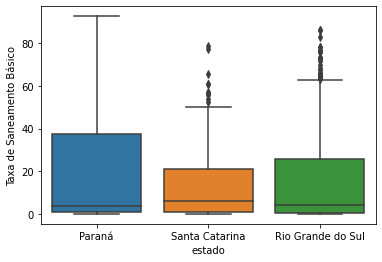

In [ ]:
df_final = pd.concat([df_PR, df_SC, df_RS])

sns.boxplot(x=df_final['estado'], y=df_final['Taxa de Saneamento Básico']);

Resposta: Observando os boxplots podemos ver que Santa Catarina e Rio Grande do Sul tem alguns outliers com valores altos e que a mediana para os três estados é semelhante, mas o terceiro quartil para o Paraná é muito maior que para os demais estados o que indica que o estado do Paraná deve possui muitos municípios com taxa de saneamento básico mais elevada em comparação com os demais estados.

### Vamos fazer um teste Post-hoc para verificar se de fato é o estado do Paraná tem média diferente dos demais estados.

Isto é, agora que sabemos que pelo menos um dos estados possui uma taxa de saneamento básico diferente dos demais, queremos encontrar qual é este estado. Este teste pode ser realizado com a função `statsmodels.stats.multicomp.pairwise_tukeyhsd()` da biblioteca `statsmodels`. Para mais informações [clique aqui](https://www.statsmodels.org/dev/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(endog = df_final['Taxa de Saneamento Básico'],
                  groups = df_final['estado'],
                  alpha = 0.05)
)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------
           Paraná Rio Grande do Sul  -4.4925 0.0057  -7.8996 -1.0854   True
           Paraná    Santa Catarina  -7.1034  0.001 -11.0013 -3.2054   True
Rio Grande do Sul    Santa Catarina  -2.6109  0.229   -6.344  1.1221  False
---------------------------------------------------------------------------


Observando o quadro acima podemos ver que Santa Catarina e Rio Grande do Sul não apresentaram diferença significativa entre si, mas o estado do Paraná apresentou diferença signicativa quando comparado com ambos. Isso pode ser observado na coluna `reject`, pois essa coluna diz se devemos ou não rejeitar a hipótese nula ($H_0$: não há diferença entre os grupos).